In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [3]:
df = pd.read_csv('../data/cleaned/cleaned_data.csv')

In [4]:
df.dtypes

age                            int64
attrition                     object
business_travel               object
daily_rate                     int64
department                    object
distance_from_home             int64
education                      int64
education_field               object
environment_satisfaction       int64
gender                        object
hourly_rate                    int64
job_involvement                int64
job_level                      int64
job_role                      object
job_satisfaction               int64
marital_status                object
monthly_income                 int64
monthly_rate                   int64
num_companies_worked           int64
over_time                     object
percent_salary_hike            int64
relationship_satisfaction      int64
stock_option_level             int64
total_working_years            int64
training_times_last_year       int64
work_life_balance              int64
years_at_company               int64
y

### Define categorical and numerical columns

In [5]:
# Identify categorical and numerical columns
categorical_columns = []
numerical_columns = []

for column in df.columns:
    if len(df[column].unique()) < 10:  
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

# Create DataFrames for categorical and numerical columns
categorical = df[categorical_columns].copy()
numerical = df[numerical_columns].copy()

# Example prints to check the results
print("Categorical DataFrame:", categorical.shape)
display(categorical.head())

print("\nNumerical DataFrame:", numerical.shape)
display(numerical.head())

Categorical DataFrame: (1470, 17)


attrition    business_travel              department  education  \
0       Yes      Travel_Rarely                   Sales          2   
1        No  Travel_Frequently  Research & Development          1   
2       Yes      Travel_Rarely  Research & Development          2   
3        No  Travel_Frequently  Research & Development          4   
4        No      Travel_Rarely  Research & Development          1   

  education_field  environment_satisfaction  gender  job_involvement  \
0   Life Sciences                         2  Female                3   
1   Life Sciences                         3    Male                2   
2           Other                         4    Male                2   
3   Life Sciences                         4  Female                3   
4         Medical                         1    Male                3   

   job_level               job_role  job_satisfaction marital_status  \
0          2        Sales Executive                 4         Single   
1          2     Research Scientist                 2        Married   
2          1  Laboratory Technician                 3         Single   
3          1     Research Scientist                 3        Married   
4          1  Laboratory Technician                 2        Married   

  over_time  relationship_satisfaction  stock_option_level  \
0       Yes                          1                   0   
1        No                          4                   1   
2       Yes                          2                   0   
3       Yes                          3                   0   
4        No                          4                   1   

   training_times_last_year  work_life_balance  
0                         0                  1  
1                         3                  3  
2                         3                  3  
3                         3                  3  
4                         3                  3


Numerical DataFrame: (1470, 13)


age  daily_rate  distance_from_home  hourly_rate  monthly_income  \
0   41        1102                   1           94            5993   
1   49         279                   8           61            5130   
2   37        1373                   2           92            2090   
3   33        1392                   3           56            2909   
4   27         591                   2           40            3468   

   monthly_rate  num_companies_worked  percent_salary_hike  \
0         19479                     8                   11   
1         24907                     1                   23   
2          2396                     6                   15   
3         23159                     1                   11   
4         16632                     9                   12   

   total_working_years  years_at_company  years_in_current_role  \
0                    8                 6                      4   
1                   10                10                      7   
2                    7                 0                      0   
3                    8                 8                      7   
4                    6                 2                      2   

   years_since_last_promotion  years_with_curr_manager  
0                           0                        5  
1                           1                        7  
2                           0                        0  
3                           3                        0  
4                           2                        2

In [6]:
numerical.dtypes

age                           int64
daily_rate                    int64
distance_from_home            int64
hourly_rate                   int64
monthly_income                int64
monthly_rate                  int64
num_companies_worked          int64
percent_salary_hike           int64
total_working_years           int64
years_at_company              int64
years_in_current_role         int64
years_since_last_promotion    int64
years_with_curr_manager       int64
dtype: object

### Plotting distribution and paired scatterplots for the subset of those who quited

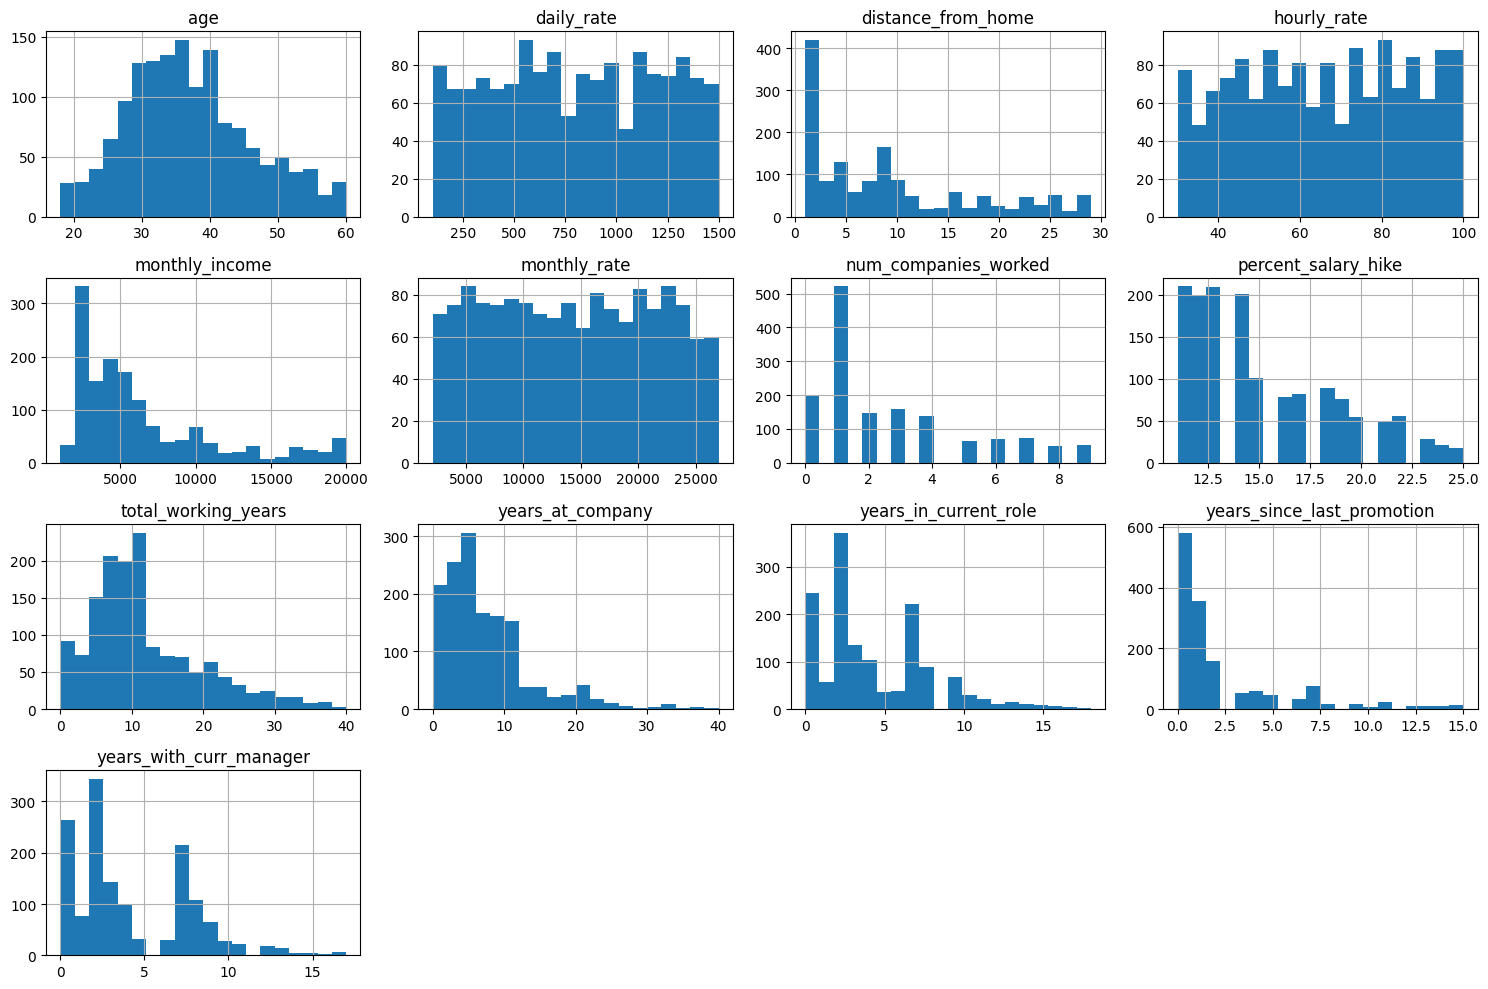

In [7]:
#Plotting the distribution of numerical columns
quited = numerical
quited.hist(bins=20, figsize=(15, 10))
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

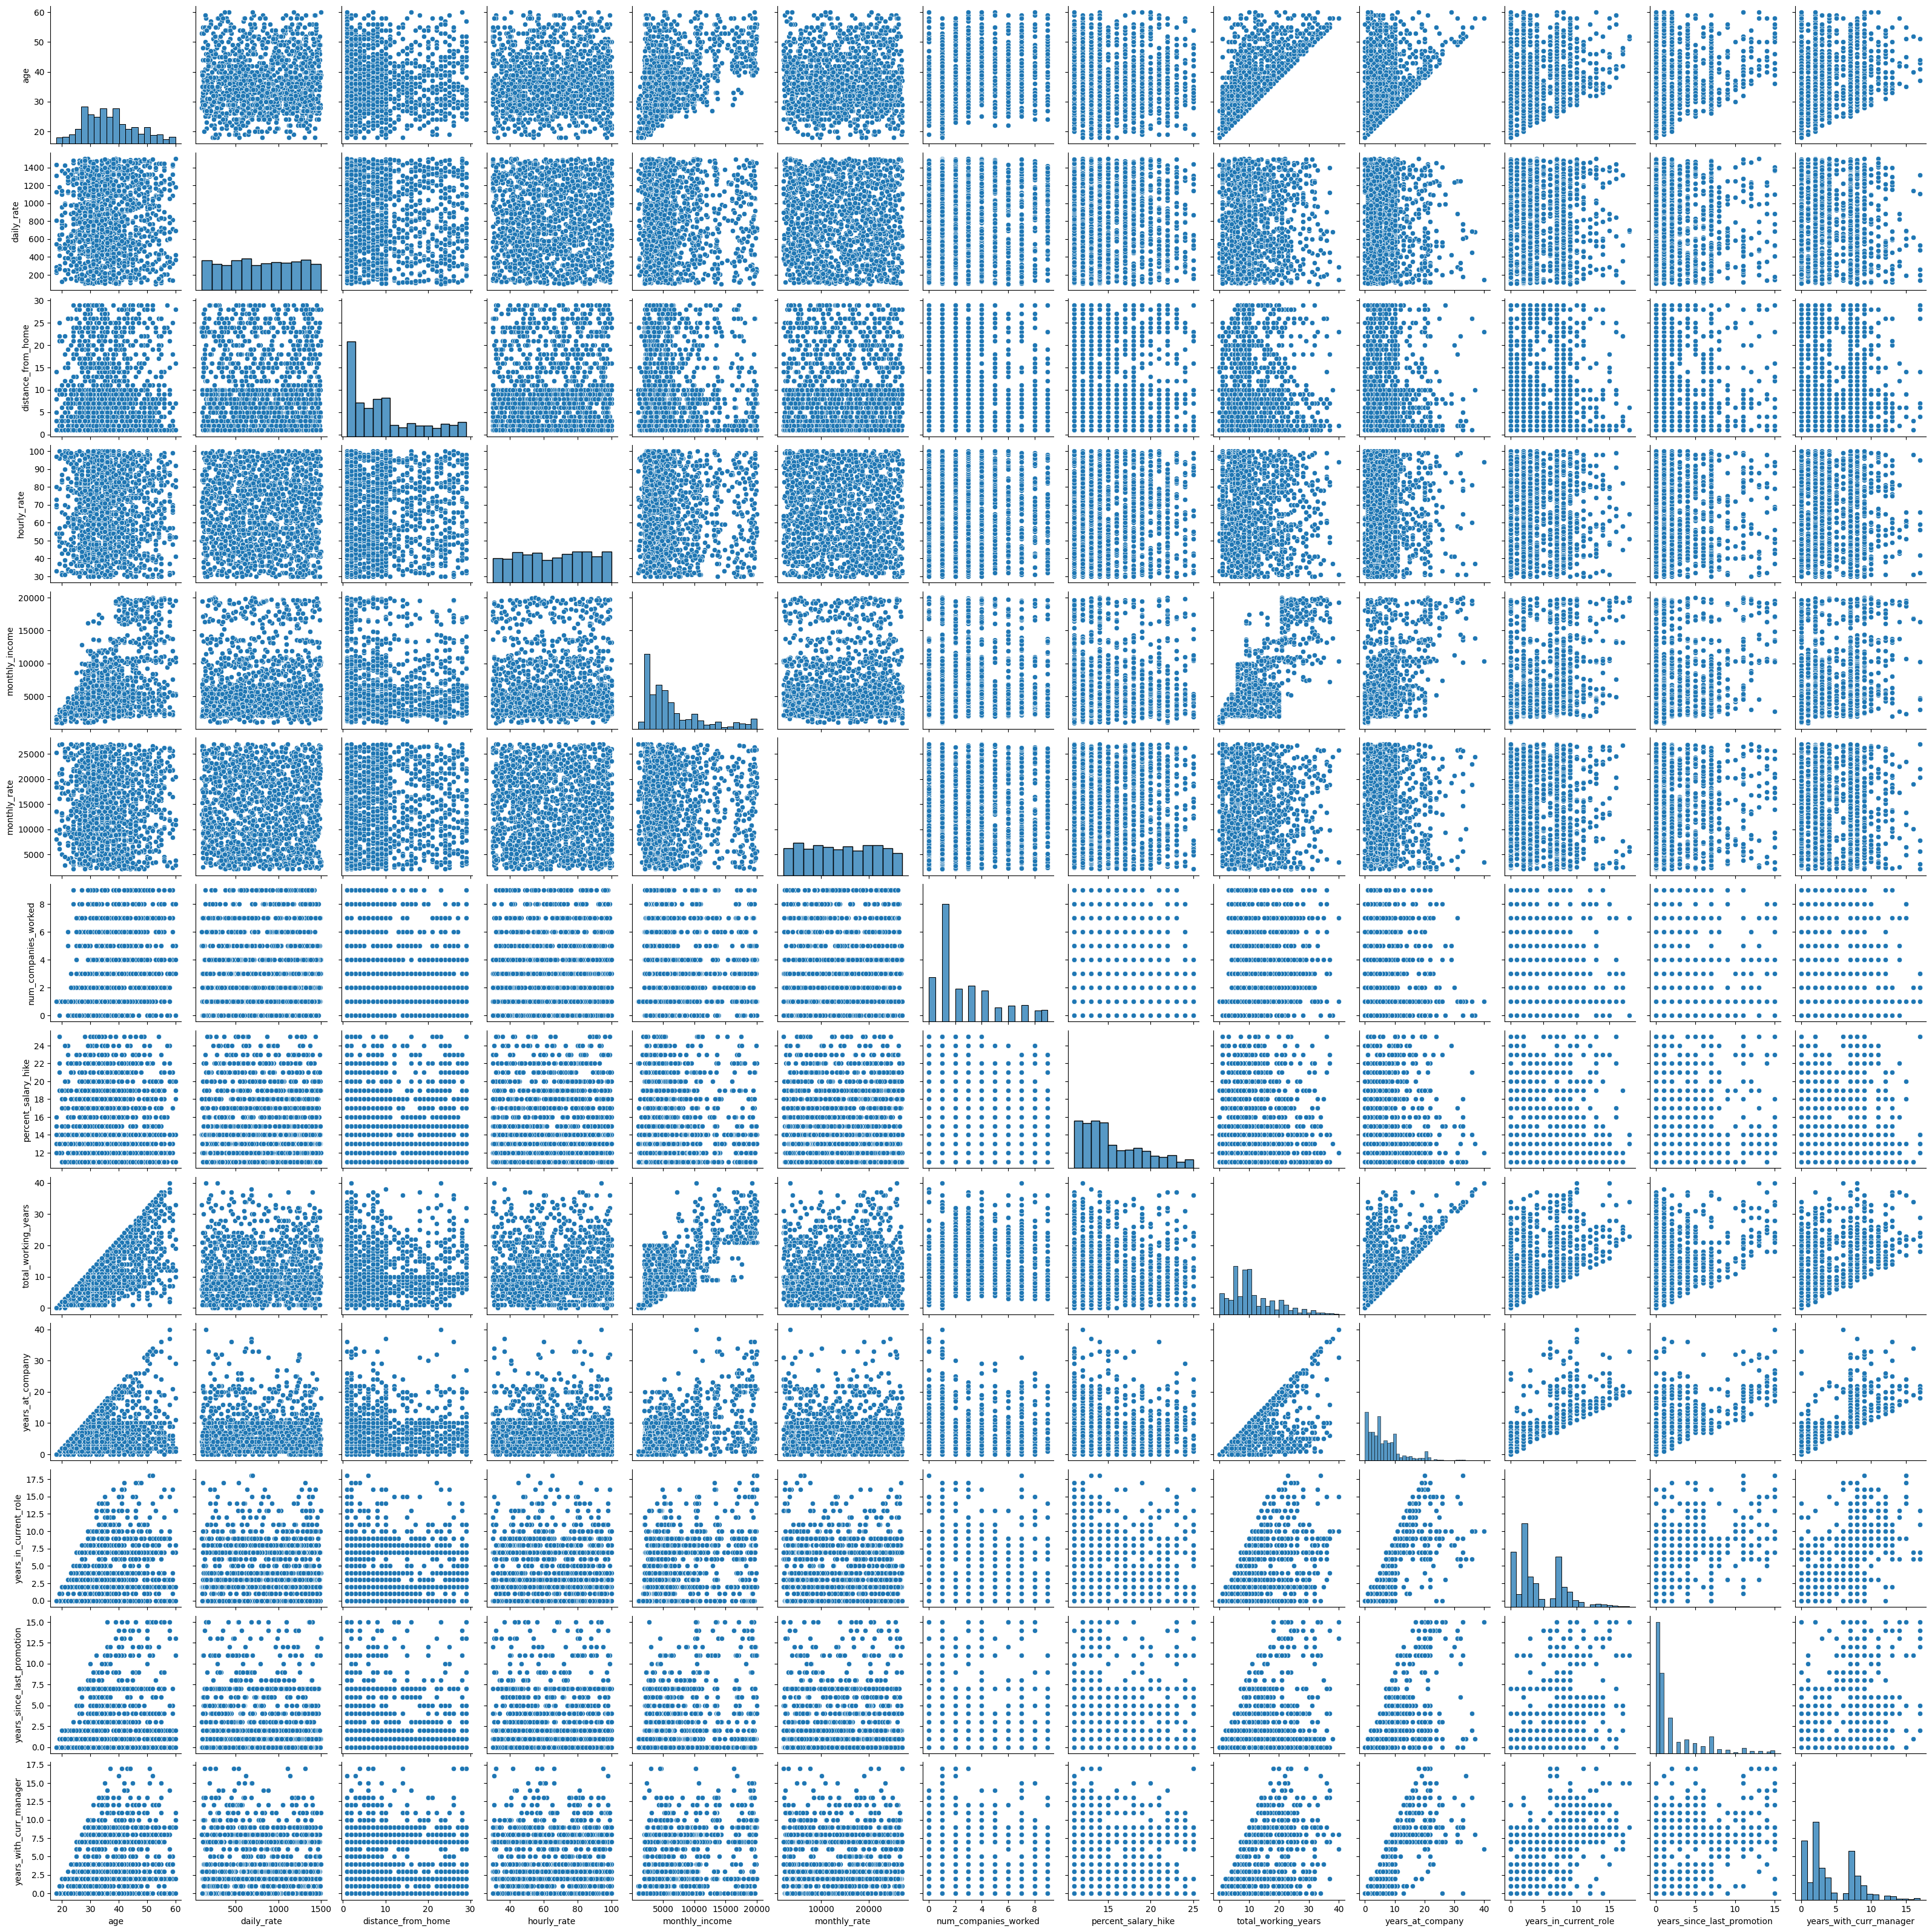

In [8]:
sns.pairplot(quited)
plt.show()

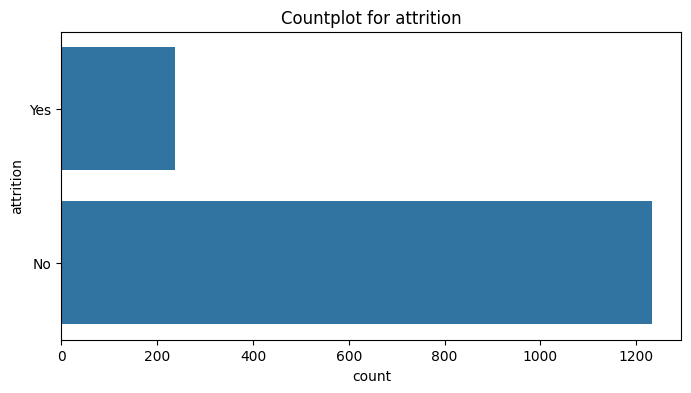

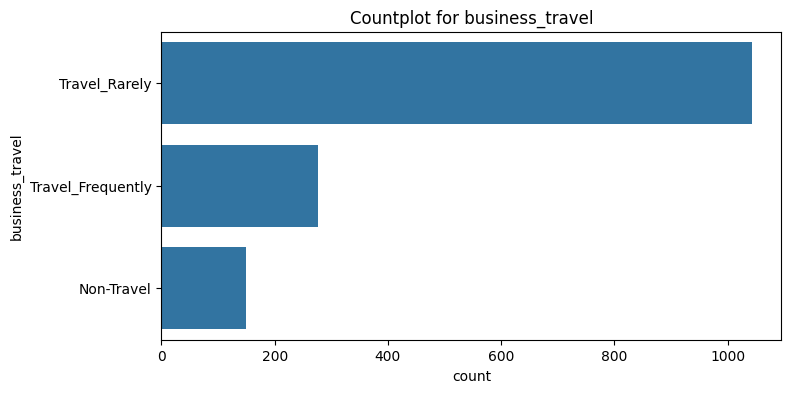

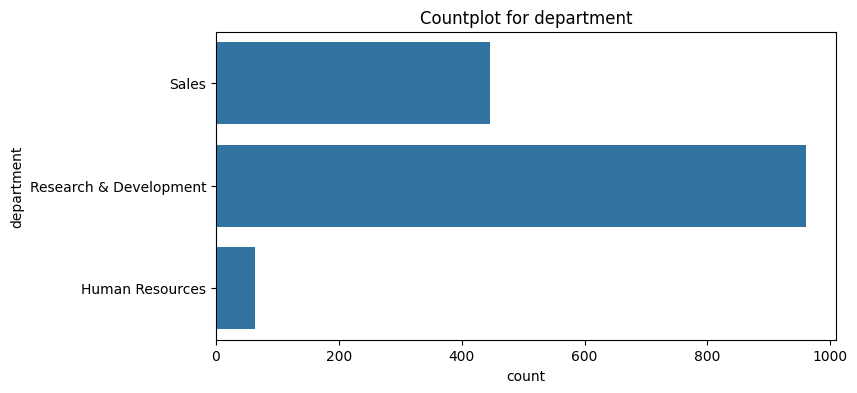

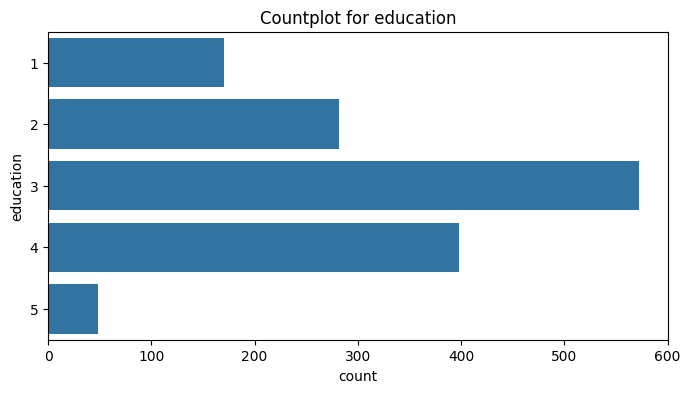

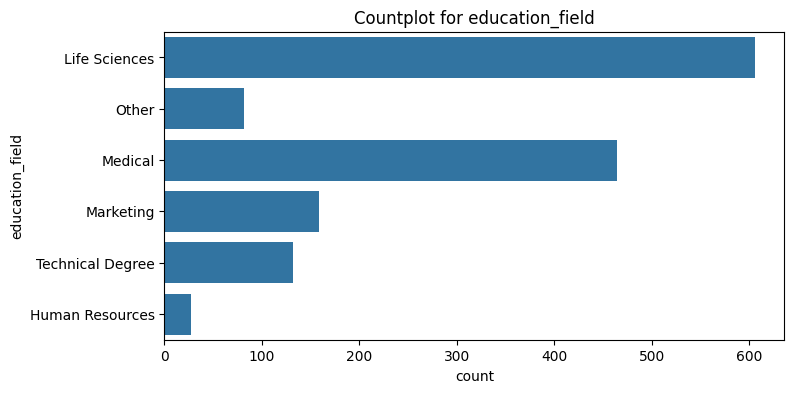

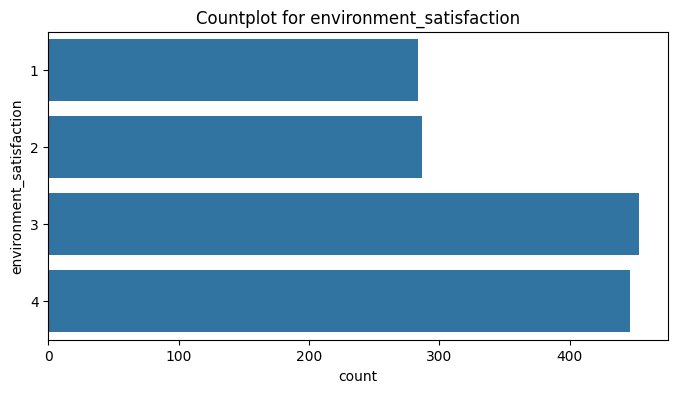

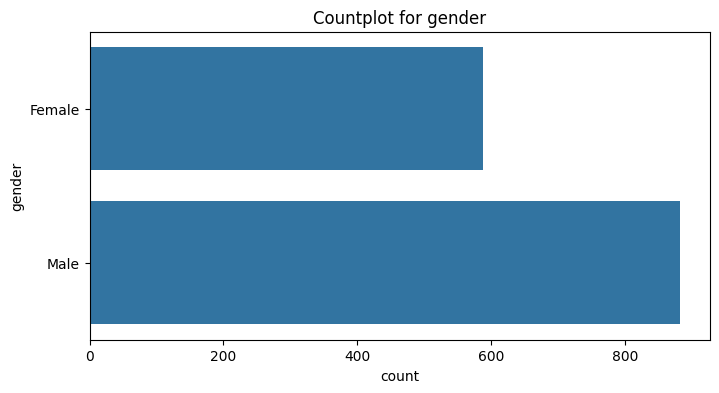

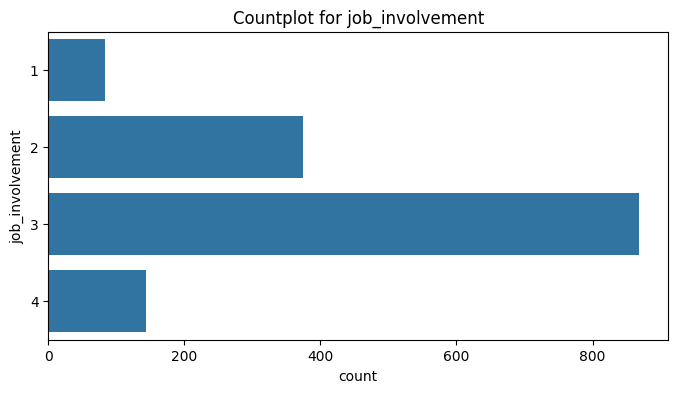

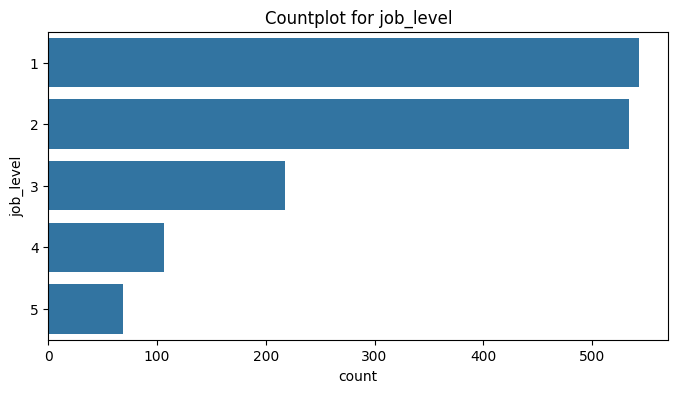

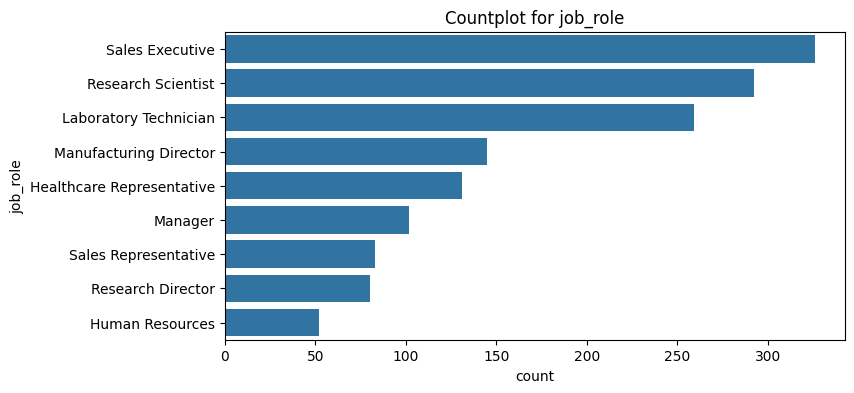

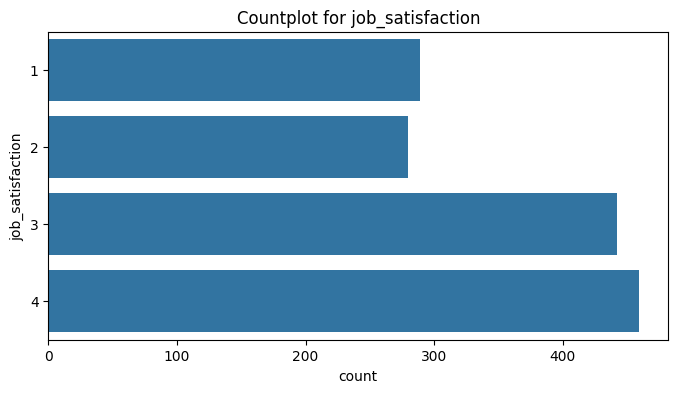

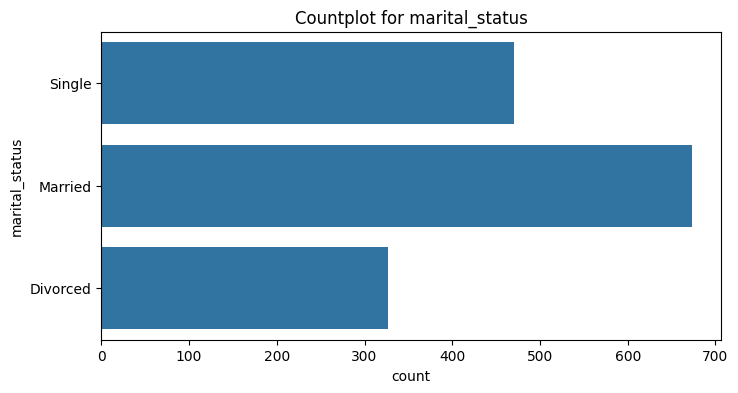

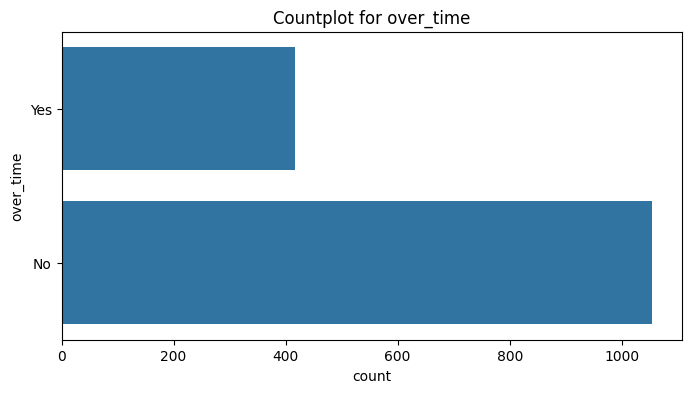

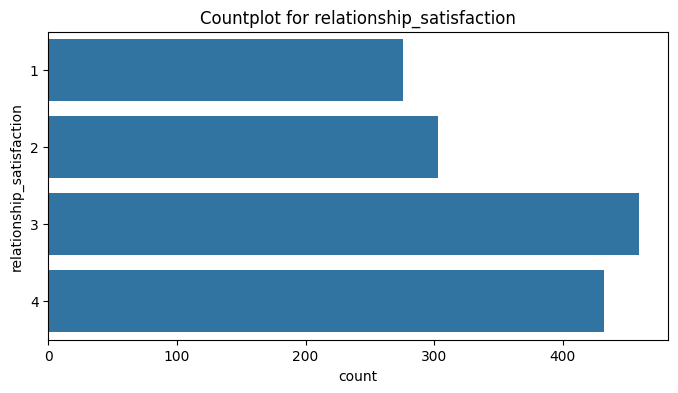

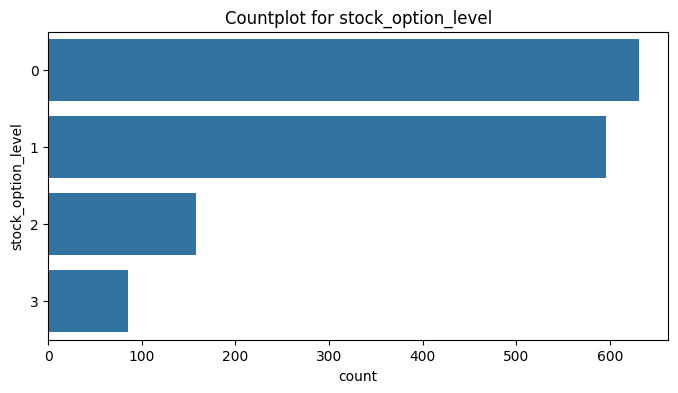

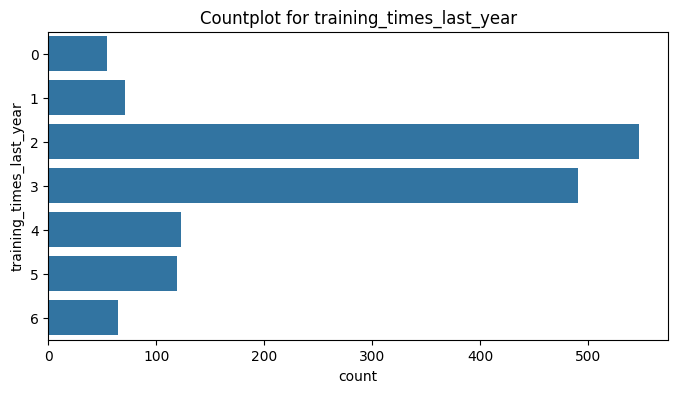

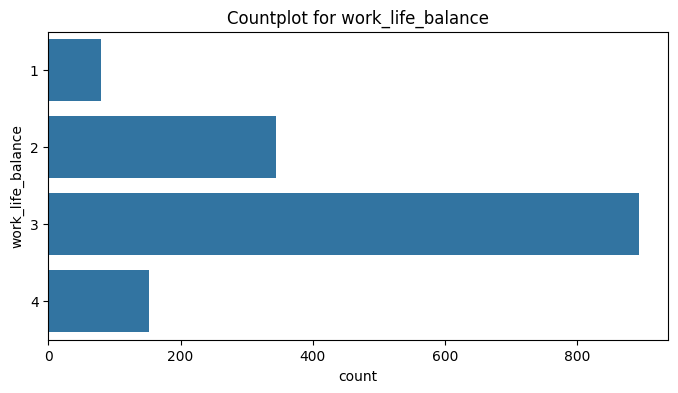

In [9]:
for column in categorical.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=column, data=categorical)
    plt.title(f'Countplot for {column}')
    plt.show()

In [10]:
columns_to_encode = ['business_travel', 'department', 'education_field', 'gender', 'job_role', 'marital_status', 'over_time']

### Correlation matrix for the numerical columns

In [11]:
correlation_matrix = numerical.corr()
correlation_matrix

age  daily_rate  distance_from_home  \
age                         1.000000    0.010661           -0.001686   
daily_rate                  0.010661    1.000000           -0.004985   
distance_from_home         -0.001686   -0.004985            1.000000   
hourly_rate                 0.024287    0.023381            0.031131   
monthly_income              0.497855    0.007707           -0.017014   
monthly_rate                0.028051   -0.032182            0.027473   
num_companies_worked        0.299635    0.038153           -0.029251   
percent_salary_hike         0.003634    0.022704            0.040235   
total_working_years         0.680381    0.014515            0.004628   
years_at_company            0.311309   -0.034055            0.009508   
years_in_current_role       0.212901    0.009932            0.018845   
years_since_last_promotion  0.216513   -0.033229            0.010029   
years_with_curr_manager     0.202089   -0.026363            0.014406   

                            hourly_rate  monthly_income  monthly_rate  \
age                            0.024287        0.497855      0.028051   
daily_rate                     0.023381        0.007707     -0.032182   
distance_from_home             0.031131       -0.017014      0.027473   
hourly_rate                    1.000000       -0.015794     -0.015297   
monthly_income                -0.015794        1.000000      0.034814   
monthly_rate                  -0.015297        0.034814      1.000000   
num_companies_worked           0.022157        0.149515      0.017521   
percent_salary_hike           -0.009062       -0.027269     -0.006429   
total_working_years           -0.002334        0.772893      0.026442   
years_at_company              -0.019582        0.514285     -0.023655   
years_in_current_role         -0.024106        0.363818     -0.012815   
years_since_last_promotion    -0.026716        0.344978      0.001567   
years_with_curr_manager       -0.020123        0.344079     -0.036746   

                            num_companies_worked  percent_salary_hike  \
age                                     0.299635             0.003634   
daily_rate                              0.038153             0.022704   
distance_from_home                     -0.029251             0.040235   
hourly_rate                             0.022157            -0.009062   
monthly_income                          0.149515            -0.027269   
monthly_rate                            0.017521            -0.006429   
num_companies_worked                    1.000000            -0.010238   
percent_salary_hike                    -0.010238             1.000000   
total_working_years                     0.237639            -0.020608   
years_at_company                       -0.118421            -0.035991   
years_in_current_role                  -0.090754            -0.001520   
years_since_last_promotion             -0.036814            -0.022154   
years_with_curr_manager                -0.110319            -0.011985   

                            total_working_years  years_at_company  \
age                                    0.680381          0.311309   
daily_rate                             0.014515         -0.034055   
distance_from_home                     0.004628          0.009508   
hourly_rate                           -0.002334         -0.019582   
monthly_income                         0.772893          0.514285   
monthly_rate                           0.026442         -0.023655   
num_companies_worked                   0.237639         -0.118421   
percent_salary_hike                   -0.020608         -0.035991   
total_working_years                    1.000000          0.628133   
years_at_company                       0.628133          1.000000   
years_in_current_role                  0.460365          0.758754   
years_since_last_promotion             0.404858          0.618409   
years_with_curr_manager                0.459188          0.769212   

           

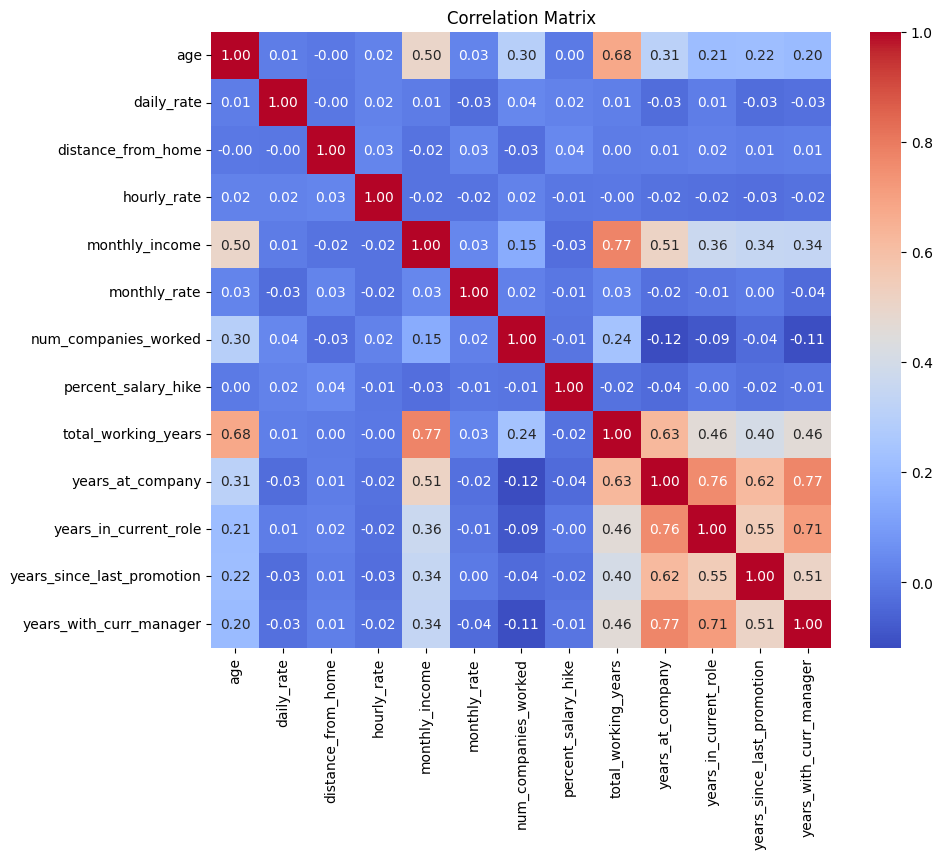

In [12]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Handling outliers

In [13]:
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Calculate z-scores to identify outliers
z_scores = zscore(numerical)

# Identify and remove rows with outliers
outlier_indices = (abs(z_scores) > 3).any(axis=1)
numerical_no_outliers = numerical[~outlier_indices]

In [14]:
numerical_no_outliers

age  daily_rate  distance_from_home  hourly_rate  monthly_income  \
0      41        1102                   1           94            5993   
1      49         279                   8           61            5130   
2      37        1373                   2           92            2090   
3      33        1392                   3           56            2909   
4      27         591                   2           40            3468   
...   ...         ...                 ...          ...             ...   
1465   36         884                  23           41            2571   
1466   39         613                   6           42            9991   
1467   27         155                   4           87            6142   
1468   49        1023                   2           63            5390   
1469   34         628                   8           82            4404   

      monthly_rate  num_companies_worked  percent_salary_hike  \
0            19479                     8                   11   
1            24907                     1                   23   
2             2396                     6                   15   
3            23159                     1                   11   
4            16632                     9                   12   
...            ...                   ...                  ...   
1465         12290                     4                   17   
1466         21457                     4                   15   
1467          5174                     1                   20   
1468         13243                     2                   14   
1469         10228                     2                   12   

      total_working_years  years_at_company  years_in_current_role  \
0                       8                 6                      4   
1                      10                10                      7   
2                       7                 0                      0   
3                       8                 8                      7   
4                       6                 2                      2   
...                   ...               ...                    ...   
1465                   17                 5                      2   
1466                    9                 7                      7   
1467                    6                 6                      2   
1468                   17                 9                      6   
1469                    6                 4                      3   

      years_since_last_promotion  years_with_curr_manager  
0                              0                        5  
1                              1                        7  
2                              0                        0  
3                              3                        0  
4                              2                        2  
...                          ...                      ...  
1465                           0                        3  
1466                           1                        7  
1467                           0                        3  
1468                           0                        8  
1469                           1                        2  

[1387 rows x 13 columns]

### Standardization of numerical variables

In [15]:
# Standardize the numerical variables after removing outliers
original_index = numerical_no_outliers.index
scaler = StandardScaler()
numerical_no_outliers = pd.DataFrame(scaler.fit_transform(numerical_no_outliers), columns=numerical_no_outliers.columns, index=original_index)

In [16]:
numerical_no_outliers

age  daily_rate  distance_from_home  hourly_rate  monthly_income  \
0     0.536681    0.734325           -1.011249     1.388670       -0.007750   
1     1.442111   -1.307769           -0.145521    -0.239091       -0.210963   
2     0.083966    1.406752           -0.887573     1.290017       -0.926802   
3    -0.368749    1.453896           -0.763898    -0.485721       -0.733949   
4    -1.047821   -0.533609           -0.887573    -1.274939       -0.602320   
...        ...         ...                 ...          ...             ...   
1465 -0.029213    0.193406            1.709609    -1.225613       -0.813539   
1466  0.310324   -0.479021           -0.392872    -1.176286        0.933672   
1467 -1.047821   -1.615447           -0.640223     1.043387        0.027336   
1468  1.442111    0.538304           -0.887573    -0.140439       -0.149740   
1469 -0.255570   -0.441802           -0.145521     0.796757       -0.381917   

      monthly_rate  num_companies_worked  percent_salary_hike  \
0         0.734688              2.125951            -1.161414   
1         1.505353             -0.672430             2.146916   
2        -1.690747              1.326414            -0.058637   
3         1.257173             -0.672430            -1.161414   
4         0.330473              2.525720            -0.885720   
...            ...                   ...                  ...   
1465     -0.286002              0.526876             0.492751   
1466      1.015523              0.526876            -0.058637   
1467     -1.296328             -0.672430             1.319834   
1468     -0.150696             -0.272661            -0.334331   
1469     -0.578764             -0.272661            -0.885720   

      total_working_years  years_at_company  years_in_current_role  \
0               -0.343728         -0.022350               0.040903   
1               -0.045106          0.832812               0.965895   
2               -0.493039         -1.305094              -1.192419   
3               -0.343728          0.405231               0.965895   
4               -0.642351         -0.877513              -0.575758   
...                   ...               ...                    ...   
1465             1.000074         -0.236141              -0.575758   
1466            -0.194417          0.191440               0.965895   
1467            -0.642351         -0.022350              -0.575758   
1468             1.000074          0.619022               0.657565   
1469            -0.642351         -0.449931              -0.267427   

      years_since_last_promotion  years_with_curr_manager  
0                      -0.710699                 0.368270  
1                      -0.310480                 0.982200  
2                      -0.710699                -1.166556  
3                       0.489958                -1.166556  
4                       0.089739                -0.552626  
...                          ...                      ...  
1465                   -0.710699                -0.245661  
1466                   -0.310480                 0.982200  
1467                   -0.710699                -0.245661  
1468                   -0.710699                 1.289165  
1469                   -0.310480                -0.552626  

[1387 rows x 13 columns]

### Checking the variables for the multicollinearity

In [17]:
# Calculate VIF for each numerical variable
vif_data = pd.DataFrame()
vif_data["Variable"] = numerical_no_outliers.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_no_outliers.values, i) for i in range(len(numerical_no_outliers.columns))]

# Display the VIF data
print(vif_data)

                      Variable       VIF
0                          age  1.787566
1                   daily_rate  1.011186
2           distance_from_home  1.006091
3                  hourly_rate  1.006563
4               monthly_income  2.263390
5                 monthly_rate  1.009308
6         num_companies_worked  1.234843
7          percent_salary_hike  1.005787
8          total_working_years  3.719419
9             years_at_company  4.843342
10       years_in_current_role  2.935941
11  years_since_last_promotion  1.427311
12     years_with_curr_manager  3.285934


In [18]:
vif_data[vif_data["VIF"] > 3]

Variable       VIF
8       total_working_years  3.719419
9          years_at_company  4.843342
12  years_with_curr_manager  3.285934

In [19]:
columns_to_drop = vif_data[vif_data["VIF"] > 3]['Variable'].tolist()
numerical_no_outliers = numerical_no_outliers.drop(columns=columns_to_drop, axis=1)

In [20]:
numerical_no_outliers

age  daily_rate  distance_from_home  hourly_rate  monthly_income  \
0     0.536681    0.734325           -1.011249     1.388670       -0.007750   
1     1.442111   -1.307769           -0.145521    -0.239091       -0.210963   
2     0.083966    1.406752           -0.887573     1.290017       -0.926802   
3    -0.368749    1.453896           -0.763898    -0.485721       -0.733949   
4    -1.047821   -0.533609           -0.887573    -1.274939       -0.602320   
...        ...         ...                 ...          ...             ...   
1465 -0.029213    0.193406            1.709609    -1.225613       -0.813539   
1466  0.310324   -0.479021           -0.392872    -1.176286        0.933672   
1467 -1.047821   -1.615447           -0.640223     1.043387        0.027336   
1468  1.442111    0.538304           -0.887573    -0.140439       -0.149740   
1469 -0.255570   -0.441802           -0.145521     0.796757       -0.381917   

      monthly_rate  num_companies_worked  percent_salary_hike  \
0         0.734688              2.125951            -1.161414   
1         1.505353             -0.672430             2.146916   
2        -1.690747              1.326414            -0.058637   
3         1.257173             -0.672430            -1.161414   
4         0.330473              2.525720            -0.885720   
...            ...                   ...                  ...   
1465     -0.286002              0.526876             0.492751   
1466      1.015523              0.526876            -0.058637   
1467     -1.296328             -0.672430             1.319834   
1468     -0.150696             -0.272661            -0.334331   
1469     -0.578764             -0.272661            -0.885720   

      years_in_current_role  years_since_last_promotion  
0                  0.040903                   -0.710699  
1                  0.965895                   -0.310480  
2                 -1.192419                   -0.710699  
3                  0.965895                    0.489958  
4                 -0.575758                    0.089739  
...                     ...                         ...  
1465              -0.575758                   -0.710699  
1466               0.965895                   -0.310480  
1467              -0.575758                   -0.710699  
1468               0.657565                   -0.710699  
1469              -0.267427                   -0.310480  

[1387 rows x 10 columns]

### MinMaxScaling

In [21]:
# MinMaxScaler (keep original indexes)
minmax_scaler = MinMaxScaler()
minmax_scaled_data = pd.DataFrame(minmax_scaler.fit_transform(numerical_no_outliers), columns=numerical_no_outliers.columns, index=original_index)

In [22]:
minmax_scaled_data

age  daily_rate  distance_from_home  hourly_rate  monthly_income  \
0     0.547619    0.716332            0.000000     0.914286        0.263230   
1     0.738095    0.126791            0.250000     0.442857        0.217651   
2     0.452381    0.910458            0.035714     0.885714        0.057093   
3     0.357143    0.924069            0.071429     0.371429        0.100349   
4     0.214286    0.350287            0.035714     0.142857        0.129872   
...        ...         ...                 ...          ...             ...   
1465  0.428571    0.560172            0.785714     0.157143        0.082497   
1466  0.500000    0.366046            0.178571     0.171429        0.474385   
1467  0.214286    0.037966            0.107143     0.814286        0.271100   
1468  0.738095    0.659742            0.035714     0.471429        0.231383   
1469  0.380952    0.376791            0.250000     0.742857        0.179307   

      monthly_rate  num_companies_worked  percent_salary_hike  \
0         0.698016              0.888889             0.000000   
1         0.915991              0.111111             0.857143   
2         0.012007              0.666667             0.285714   
3         0.845796              0.111111             0.000000   
4         0.583688              1.000000             0.071429   
...            ...                   ...                  ...   
1465      0.409325              0.444444             0.428571   
1466      0.777448              0.444444             0.285714   
1467      0.123564              0.111111             0.642857   
1468      0.447595              0.222222             0.214286   
1469      0.326520              0.222222             0.071429   

      years_in_current_role  years_since_last_promotion  
0                  0.266667                    0.000000  
1                  0.466667                    0.090909  
2                  0.000000                    0.000000  
3                  0.466667                    0.272727  
4                  0.133333                    0.181818  
...                     ...                         ...  
1465               0.133333                    0.000000  
1466               0.466667                    0.090909  
1467               0.133333                    0.000000  
1468               0.400000                    0.000000  
1469               0.200000                    0.090909  

[1387 rows x 10 columns]

In [23]:
# Merge DataFrames based on indexes
combined_data = pd.merge(minmax_scaled_data, categorical, how='left', left_index=True, right_index=True)

# Display the combined DataFrame
print("Combined DataFrame:")
combined_data

Combined DataFrame:


age  daily_rate  distance_from_home  hourly_rate  monthly_income  \
0     0.547619    0.716332            0.000000     0.914286        0.263230   
1     0.738095    0.126791            0.250000     0.442857        0.217651   
2     0.452381    0.910458            0.035714     0.885714        0.057093   
3     0.357143    0.924069            0.071429     0.371429        0.100349   
4     0.214286    0.350287            0.035714     0.142857        0.129872   
...        ...         ...                 ...          ...             ...   
1465  0.428571    0.560172            0.785714     0.157143        0.082497   
1466  0.500000    0.366046            0.178571     0.171429        0.474385   
1467  0.214286    0.037966            0.107143     0.814286        0.271100   
1468  0.738095    0.659742            0.035714     0.471429        0.231383   
1469  0.380952    0.376791            0.250000     0.742857        0.179307   

      monthly_rate  num_companies_worked  percent_salary_hike  \
0         0.698016              0.888889             0.000000   
1         0.915991              0.111111             0.857143   
2         0.012007              0.666667             0.285714   
3         0.845796              0.111111             0.000000   
4         0.583688              1.000000             0.071429   
...            ...                   ...                  ...   
1465      0.409325              0.444444             0.428571   
1466      0.777448              0.444444             0.285714   
1467      0.123564              0.111111             0.642857   
1468      0.447595              0.222222             0.214286   
1469      0.326520              0.222222             0.071429   

      years_in_current_role  years_since_last_promotion  ... job_involvement  \
0                  0.266667                    0.000000  ...               3   
1                  0.466667                    0.090909  ...               2   
2                  0.000000                    0.000000  ...               2   
3                  0.466667                    0.272727  ...               3   
4                  0.133333                    0.181818  ...               3   
...                     ...                         ...  ...             ...   
1465               0.133333                    0.000000  ...               4   
1466               0.466667                    0.090909  ...               2   
1467               0.133333                    0.000000  ...               4   
1468               0.400000                    0.000000  ...               2   
1469               0.200000                    0.090909  ...               4   

     job_level                   job_role  job_satisfaction marital_status  \
0            2            Sales Executive                 4         Single   
1            2         Research Scientist                 2        Married   
2            1      Laboratory Technician                 3         Single   
3            1         Research Scientist                 3        Married   
4            1      Laboratory Technician                 2        Married   
...        ...                        ...               ...            ...   
1465         2      Laboratory Technician                 4        Married   
1466         3  Healthcare Representative                 1        Married   
1467         2     Manufacturing Director                 2        Married   
1468         2            Sales Executive                 2        Married   
1469         2      Laboratory Technician                 3        Married   

      over_time relationship_satisfaction  stock_option_level  \
0           Yes                         1                   0   
1            No                         4                   1   
2           Yes                         2                   0   
3           Yes                         3                   0   
4            No                         4                 

In [25]:
combined_data.dtypes

age                           float64
daily_rate                    float64
distance_from_home            float64
hourly_rate                   float64
monthly_income                float64
monthly_rate                  float64
num_companies_worked          float64
percent_salary_hike           float64
years_in_current_role         float64
years_since_last_promotion    float64
attrition                      object
business_travel                object
department                     object
education                       int64
education_field                object
environment_satisfaction        int64
gender                         object
job_involvement                 int64
job_level                       int64
job_role                       object
job_satisfaction                int64
marital_status                 object
over_time                      object
relationship_satisfaction       int64
stock_option_level              int64
training_times_last_year        int64
work_life_ba

In [24]:
#combined_data.to_csv('../data/cleaned/combined_data.csv', index=False)